Import modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error


Loading csv file onto dataframe

In [2]:
fin = open("bike-sharing-daily.csv","r")
df = pd.read_csv('bike-sharing-daily.csv', sep=',', parse_dates=['dteday'], index_col='dteday')

Remove empty columns

In [3]:
#Remove empty columns
empty_cols = [col for col in df.columns if df[col].isnull().all()]
# Drop these columns from the dataframe
df.drop(empty_cols,
        axis=1,
        inplace=True)

Processing columns according to their datatype

In [4]:
headers = list(df.columns)
headers[-1]=headers[-1].strip("\n")
boolean, numeric = [],[]
mostunique = [headers[1],0]
for h in headers:
    temp = df[h].dropna()
    temp = [i for i in temp if i is not None]
    
    if (len(set(temp))==2 and len(temp)>2):
        boolean.append(h)
    elif (df[h].dtype == np.int64 or df[h].dtype==np.float64) :
        numeric.append(h)
    else:
        if eval(str(len(set(df[h].tolist())))+"/"+str(len(df[h].tolist())))>mostunique[1]:
            mostunique = [h, eval(str(len(set(df[h].tolist())))+"/"+str(len(df[h].tolist())))]

Normalise dataframe

In [5]:
df = df.loc[:,~df.columns.duplicated()]
dup = df[df.duplicated(keep="first")]
#Processing duplicates and n
dfcopy = df.copy(deep = True)
column_means = df.interpolate()
for i in df.columns[df.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    if i in boolean:
        df[i].fillna(df[i].mode(),inplace=True)
    else:
        df[i].fillna(df[i].interpolate(method='spline', order = 3, limit_direction='forward'),inplace=True)
df = df.drop_duplicates()
dfcopy = dfcopy.drop_duplicates()

df = df.dropna()

Display histogram of all fields

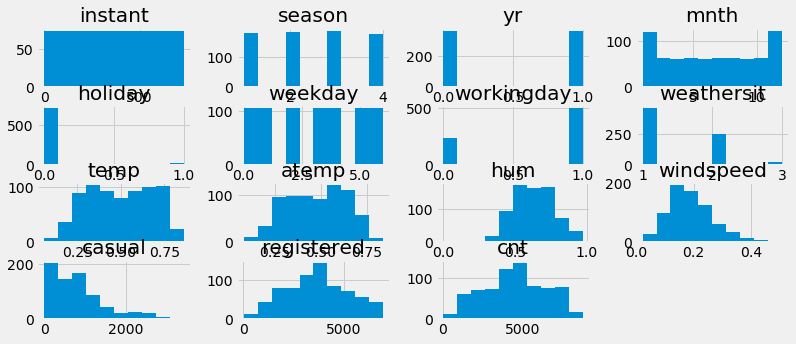

In [6]:
xfield = mostunique[0]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,5))
df.hist(ax=ax1)
#df.plot(kind='kde', ax=ax2)
plt.show()

Loop to process numeric fields and produce forecasts of them

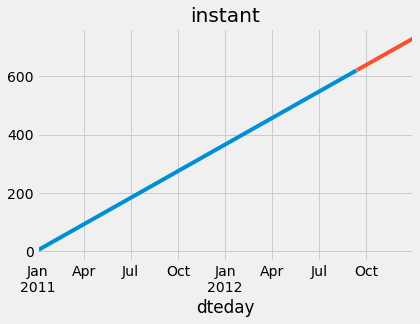

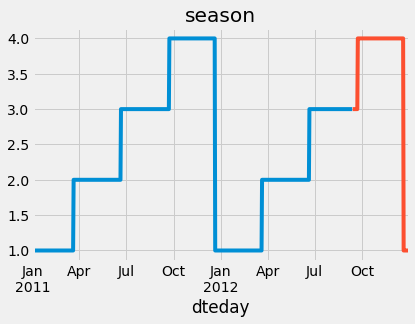

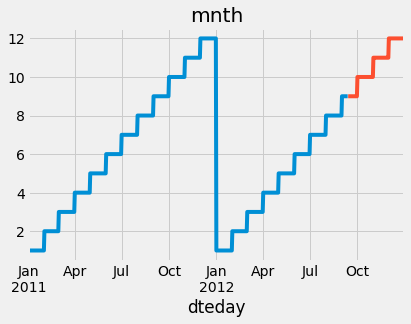

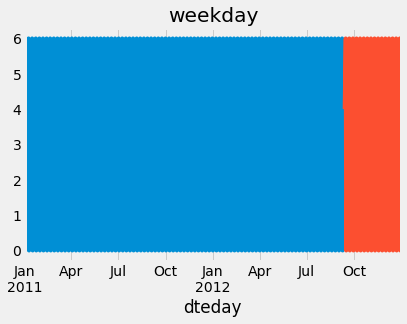

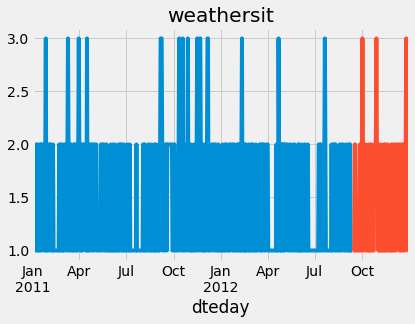

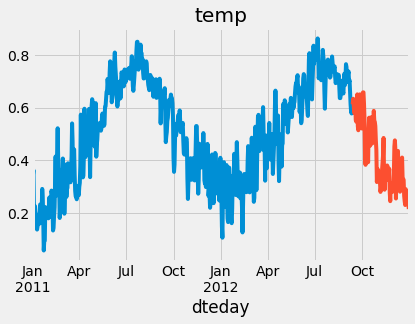

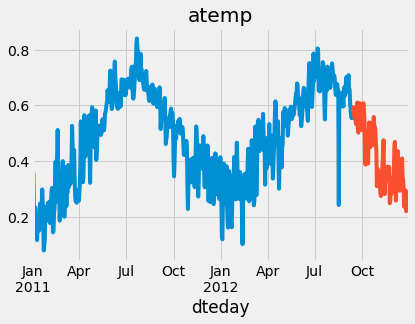

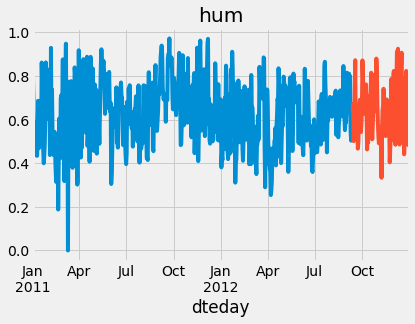

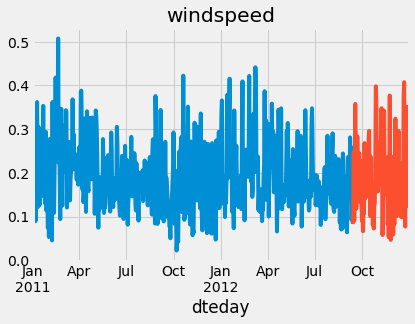

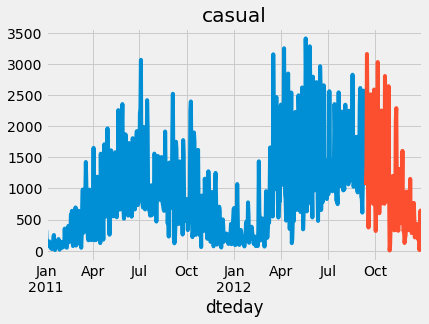

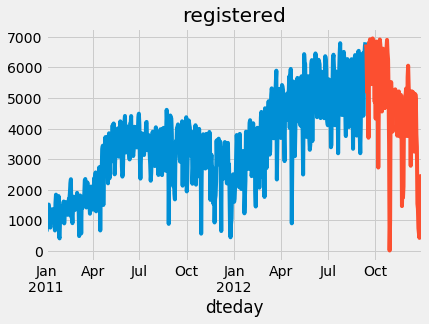

In [ ]:
for n in numeric:
    df_diff = df.diff().diff(12)
    df_diff.dropna(inplace=True)
    dftest = adfuller(df_diff[n])

    #divide into train and validation set
    train = df[:int(0.85*(len(df)))]
    test = df[int(0.85*(len(df))):]
    
    #plotting the data
    train[n].plot()
    test[n].plot()
    plt.title(n)
    plt.show()